In [1]:
import os
import random
import shutil
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   
import numpy as np

In [2]:
gen = r"C:\Users\Admin\Documents\Python Scripts\diabetic_retinopathy\data\preprocessed\train\with_dr_synth"
synthetic = list(os.walk(gen))[0][2]
random.seed(42)
synthetic = random.sample(synthetic, 177)
synthetic = [gen + "\\" + s for s in synthetic]
synthetic[0:5]

['C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\with_dr_synth\\with_dr_gen (667).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\with_dr_synth\\with_dr_gen (1409).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\with_dr_synth\\with_dr_gen (1090).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\with_dr_synth\\with_dr_gen (2011).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\with_dr_synth\\with_dr_gen (1901).jpeg']

In [3]:
base = r"C:\Users\Admin\Documents\Python Scripts\diabetic_retinopathy\data\preprocessed\train\setup_1_imbalanced\with_dr"
real = sorted(list(os.walk(base))[0][2])
random.seed(0)
real = random.sample(real, 177)
real = [base + "\\" + r for r in real]
real[0:5]

['C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (615).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (681).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (1072).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (383).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (849).jpeg']

In [4]:
combined = real + synthetic
random.seed(101)
random.shuffle(combined)
combined[0:5]

['C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (412).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (938).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\with_dr_synth\\with_dr_gen (1821).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\with_dr_synth\\with_dr_gen (998).jpeg',
 'C:\\Users\\Admin\\Documents\\Python Scripts\\diabetic_retinopathy\\data\\preprocessed\\train\\setup_1_imbalanced\\with_dr\\with_dr (238).jpeg']

In [5]:
rvf = "data/real_vs_fake/"
if not os.path.exists(rvf):
    os.makedirs(rvf)

In [6]:
combined_dict = dict()
for idx, file_path in enumerate(combined):
    destination_path = rvf + str(idx+1) + ".jpeg" 
    shutil.copy(file_path, destination_path)
    if "_gen" in file_path:
        combined_dict[destination_path] = "synthetic"
    else:
        combined_dict[destination_path] = "real"

In [11]:
combined_df = pd.DataFrame([combined_dict]).T
combined_df.reset_index(inplace=True)
combined_df.columns = ["file_path", "class"]
combined_df.head()

,file_path,class
0,data/real_vs_fake/1.jpeg,real
1,data/real_vs_fake/2.jpeg,real
2,data/real_vs_fake/3.jpeg,synthetic
3,data/real_vs_fake/4.jpeg,synthetic
4,data/real_vs_fake/5.jpeg,real


In [14]:
combined_df["class"].value_counts()

real         177
synthetic    177
Name: class, dtype: int64

In [16]:
combined_df.to_csv("data/combined_data.csv", index=False)

In [2]:
combined_df = pd.read_csv("data/combined_data.csv")
combined_df.columns = ["file_path", "ground_truth"]
combined_df.head()

,file_path,ground_truth
0,data/real_vs_fake/1.jpeg,real
1,data/real_vs_fake/2.jpeg,real
2,data/real_vs_fake/3.jpeg,synthetic
3,data/real_vs_fake/4.jpeg,synthetic
4,data/real_vs_fake/5.jpeg,real


In [3]:
f_human = r"C:\Users\Admin\Documents\Python Scripts\diabetic_retinopathy\data\real_vs_fake_human\fake"
f_files = ["data/real_vs_fake/" + file for file in list(os.walk(f_human))[0][2]]
f_files[0:5]

['data/real_vs_fake/100.jpeg',
 'data/real_vs_fake/101.jpeg',
 'data/real_vs_fake/102.jpeg',
 'data/real_vs_fake/105.jpeg',
 'data/real_vs_fake/106.jpeg']

In [4]:
r_human = r"C:\Users\Admin\Documents\Python Scripts\diabetic_retinopathy\data\real_vs_fake_human\real"
r_files = ["data/real_vs_fake/" + file for file in list(os.walk(r_human))[0][2]]
r_files[0:5]

['data/real_vs_fake/1.jpeg',
 'data/real_vs_fake/10.jpeg',
 'data/real_vs_fake/103.jpeg',
 'data/real_vs_fake/104.jpeg',
 'data/real_vs_fake/107.jpeg']

In [5]:
combined_df["human_label"] = combined_df["file_path"].apply(lambda x: "real" if x in r_files else "synthetic")
combined_df.head()

,file_path,ground_truth,human_label
0,data/real_vs_fake/1.jpeg,real,real
1,data/real_vs_fake/2.jpeg,real,real
2,data/real_vs_fake/3.jpeg,synthetic,synthetic
3,data/real_vs_fake/4.jpeg,synthetic,synthetic
4,data/real_vs_fake/5.jpeg,real,real


In [6]:
labels = ["real", "synthetic"]
cf_matrix = confusion_matrix(combined_df["ground_truth"], combined_df["human_label"], labels=labels)

In [7]:
cf_matrix

array([[175,   2],
       [  3, 174]], dtype=int64)

Text(33.0, 0.5, 'expert label')

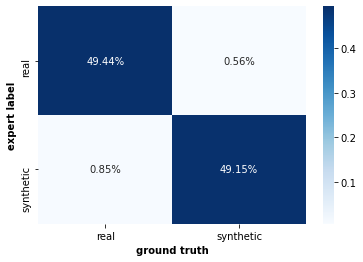

In [12]:
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
plt.xlabel("ground truth", weight="bold")
plt.ylabel("expert label", weight="bold")